In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
%matplotlib inline
import PIL
import math


In [2]:
tf. __version__

'2.0.0'

In [3]:
def cutWorkSpace(img,border): 
    # dimensioni immagini
    img_h = 2048
    img_l = 2048
    # offset per posizionamento su area d'indagine
    offset_x = 600
    offset_y = 500
    
    #taglio per garantire la ricerca sull'area di interesse, evitando rumori dati dallo sfondo
    crop_img = img[offset_y:img_h-offset_y, offset_x:img_l-offset_x]
    
    # Convert the img to grayscale
    gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    high_thresh, thresh_im = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #cv2.imwrite('provaT.jpg', thresh_im)
    lowThresh = 0.5*high_thresh
    
    
    # Apply edge detection method on the image
    #edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    #plt.imshow(edges)
    #plt.show()
    #cv2.imwrite('results_img/'+str(count_img)+'ed.jpg', edges)
    #cv2.imwrite('canny.jpg', edges)
    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges,1,np.pi/180, 100)
    #cv2.imwrite('Risultati/resFS'+name+'c.jpg', edges)
    # The below for loop runs till r and theta values 
    # are in the range of the 2d array
    i = 0
    x_first = 0
    x_second = 0
    count = 0
    delta = 35
    thetaFinal = 0
    while count < 2:
        for r,theta in lines[i]:
            # Stores the value of cos(theta) in a
            a = np.cos(theta)

            # Stores the value of sin(theta) in b
            b = np.sin(theta)

            # x0 stores the value rcos(theta)
            x0 = a*r

            # y0 stores the value rsin(theta)
            y0 = b*r

            #ti define line lenght
            const = 3000
            # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
            x1 = int(x0 + const*(-b))

            # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
            y1 = int(y0 + const*(a))

            # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
            x2 = int(x0 - const*(-b))

            # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
            y2 = int(y0 - const*(a))

            if count == 0 :
                if theta != 0:
                    thetaFinal = 180-math.degrees(theta)
                x_first = x0
                #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                count += 1
            else:
                if abs(x_first-x0) > delta :
                    x_second = x0
                    #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                    count += 1
            i += 1
    # All the changes made in the input image are finally
    # written on a new image houghlines.jpg
    #cv2.imwrite('Risultati/res'+name+'.jpg', img)
    (h, w) = img.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by Theta degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), -thetaFinal, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    scale_percent = 100 # percent of original size

  
    if x_first < x_second:
        
        median = (x_second+x_first)//2
        temp = rotated[0:img_h-1, int(offset_x+median-border):int(offset_x+median+border)]
        width = int(temp.shape[1] * scale_percent / 100)
        height = int(temp.shape[0] * scale_percent / 100)
        dim = (width, height)
        temp = cv2.resize(temp, dim, interpolation = cv2.INTER_AREA)        
        gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
        return  gray
    else:
        median = (x_first+x_second)//2.
        temp = rotated[0:img_h-1, int(offset_x+median-border):int(offset_x+median+border)]        
        #blurred = cv2.GaussianBlur(temp, (3,3), 0)
        width = int(temp.shape[1] * scale_percent / 100)
        height = int(temp.shape[0] * scale_percent / 100)
        dim = (width, height)
        temp = cv2.resize(temp, dim, interpolation = cv2.INTER_AREA)
        gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
        return  gray
    

In [4]:
def divideImage(img,pcs):
    results = []
    lung = len(img) // pcs
    for i in range(pcs):
        results.append(img[(lung*i):(lung*(i+1)-1)][:])
    final_res = []
    for res in results:
        final_res.append(cv2.resize(res, (rows,col), interpolation = cv2.INTER_AREA))
    return final_res

In [5]:
rows = 32
col = 32

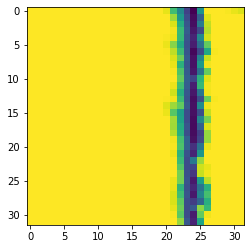

In [6]:
pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/S606C/Cam3@00004/*.tif'
#pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/S606C/Cam3@00004/*.tif'
pathFS = '/Users/leonardoaggio/Desktop/Dataset/S606C/FalsiScarti/*.tif'
#pathScarti = '/Users/leonardoaggio/Desktop/Dataset/S606C/Scarti/*.tif'
pathBuoniVal = '/Users/leonardoaggio/Desktop/Dataset/S606C/BuoniVal/*.tif'
#pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/S606C/Cam3@00004/*.tif'
pathFSVal = '/Users/leonardoaggio/Desktop/Dataset/S606C/FalsiScartiVal/*.tif'
pathScartiVal = '/Users/leonardoaggio/Desktop/Dataset/S606C/ScartiVal/*.tif'


rows = 32
col = 32

pezziXimmagine = 17
border = 60
#Nclusters = 10

#results = []
img_train = []
img_test = []


list_paths = []



list_paths = glob.glob(pathBuoni)
list_paths += glob.glob(pathFS) 
#list_paths += glob.glob(pathScarti) 

count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    #try:
    img_train +=  divideImage(cutWorkSpace(img,border),pezziXimmagine)
    count += 1
    #except:
        #print('errore lettura')


list_paths = glob.glob(pathBuoniVal)
list_paths += glob.glob(pathFSVal) 
#list_paths += glob.glob(pathScartiVal) 

count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    try:
        img_test +=  divideImage(cutWorkSpace(img,border),pezziXimmagine)
        count += 1
    except:
        print('errore lettura')



#####
# ORA HO IMG_RESULTS & RESULTS
plt.imshow(img_test[0])
plt.show()

In [7]:

x_train = np.array(img_train)




x_train = x_train/255.
x_temp = np.empty((len(img_train), rows,col,1))
x_train = x_train.astype('float32')
for i in range(len(img_train)):
    x_temp[i]=(np.expand_dims(x_train[i], axis=2))
x_train = x_temp



x_temp = np.empty((len(img_train), rows,col,1))


x_temp = x_train.astype('float32')


x_test = np.array(img_test)
x_test = x_test/255.

x_temp = np.empty((len(img_test), rows,col,1))
for i in range(len(x_test)):
    x_temp[i]=(np.expand_dims(x_test[i], axis=2))
x_test = x_temp


x_train = x_train.astype('float32')

x_test = x_test.astype('float32')


In [8]:
x_test[0][0][0]

array([1.], dtype=float32)

In [9]:
x_train[0][0][0]

array([1.], dtype=float32)

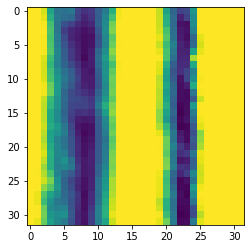

In [10]:
plt.imshow(x_test[10])
plt.show()

In [11]:
from tensorflow.keras import layers 
from keras.layers.merge import concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input

inputs = tf.keras.Input(shape=(rows,col, 1), name='input_layer')

encoder = layers.Conv2D(16,kernel_size=3,activation='relu',padding='same',strides=2)(inputs)
encoder = layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',strides=2)(encoder)
encoder = layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',strides=2)(encoder)
encoder = layers.Flatten()(encoder)
encoder = layers.Dense(units=512,activation='sigmoid')(encoder)
encoder = layers.Dense(units=256,activation='sigmoid')(encoder)
decoder = layers.Dense(units=512,activation='sigmoid')(encoder)
decoder = layers.Reshape((4,4,32))(decoder)
decoder = layers.Conv2DTranspose(32,kernel_size=3,activation='relu',padding='same',strides=2)(decoder)
decoder = layers.Conv2DTranspose(32,kernel_size=3,strides=2,activation='relu',padding='same')(decoder)
decoder = layers.Conv2DTranspose(16,kernel_size=3,strides=2,activation='relu',padding='same')(decoder)
outputs = layers.Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same')(decoder)




Using TensorFlow backend.
2021-12-29 17:28:58.510036: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-29 17:28:58.510406: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
#outputs.summary()

In [13]:
def SSIMLoss(y_true, y_pred):
    
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)

    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))




In [14]:
optimizer = tf.keras.optimizers.Adam(lr = 0.0005)

from keras.layers import Concatenate, Dense, LSTM, Input, concatenate




In [15]:
autoencoder = tf.keras.Model(inputs, outputs)
autoencoder.compile(optimizer=optimizer, loss=SSIMLoss)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328

In [16]:
hist=autoencoder.fit(x_train, x_train,
                epochs=150,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                )


Train on 8075 samples, validate on 731 samples
Epoch 1/150
8075/8075 [==============================] - 18s 2ms/sample - loss: 0.7405 - val_loss: 0.8494
Epoch 2/150
8075/8075 [==============================] - 15s 2ms/sample - loss: 0.6525 - val_loss: 0.6435
Epoch 3/150
8075/8075 [==============================] - 15s 2ms/sample - loss: 0.4596 - val_loss: 0.3655
Epoch 4/150
8075/8075 [==============================] - 15s 2ms/sample - loss: 0.2903 - val_loss: 0.2250
Epoch 5/150
8075/8075 [==============================] - 16s 2ms/sample - loss: 0.1953 - val_loss: 0.1872
Epoch 6/150
8075/8075 [==============================] - 16s 2ms/sample - loss: 0.1733 - val_loss: 0.1694
Epoch 7/150
8075/8075 [==============================] - 15s 2ms/sample - loss: 0.1592 - val_loss: 0.1538
Epoch 8/150
8075/8075 [==============================] - 15s 2ms/sample - loss: 0.1443 - val_loss: 0.1431
Epoch 9/150
8075/8075 [==============================] - 15s 2ms/sample - loss: 0.1334 - val_loss: 0.1347

In [17]:
autoencoder.save('newFormatVersion3',save_format='h5')

In [18]:
autoencoder_copy = autoencoder

In [ ]:
autoencoder_copy = tf.keras.models.load_model('newFormatVersion3', compile=False)
autoencoder_copy.compile(optimizer=optimizer, loss=SSIMLoss)

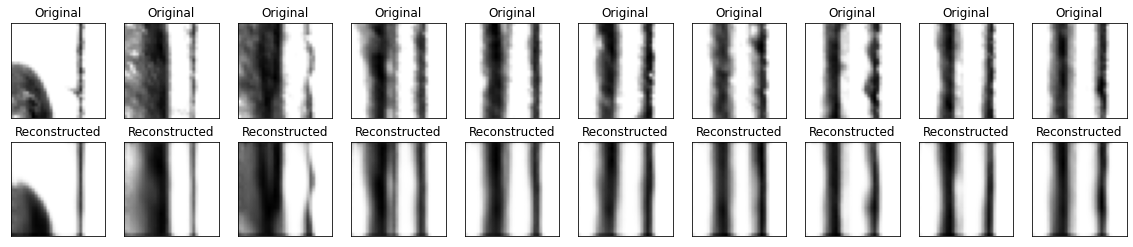

In [19]:
decoded_imgs = autoencoder_copy.predict(x_train)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i].reshape(rows,col))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i].reshape(rows,col))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
decoded_imgs = autoencoder_copy.predict(x_test)

In [21]:
values1 = []

for i in range(len(x_test)):
    print(str(i)+'/'+str(len(x_test)))


    value_a = SSIMLoss(x_test[i],decoded_imgs[i])
    values1.append(value_a.numpy())

0/731
1/731
2/731
3/731
4/731
5/731
6/731
7/731
8/731
9/731
10/731
11/731
12/731
13/731
14/731
15/731
16/731
17/731
18/731
19/731
20/731
21/731
22/731
23/731
24/731
25/731
26/731
27/731
28/731
29/731
30/731
31/731
32/731
33/731
34/731
35/731
36/731
37/731
38/731
39/731
40/731
41/731
42/731
43/731
44/731
45/731
46/731
47/731
48/731
49/731
50/731
51/731
52/731
53/731
54/731
55/731
56/731
57/731
58/731
59/731
60/731
61/731
62/731
63/731
64/731
65/731
66/731
67/731
68/731
69/731
70/731
71/731
72/731
73/731
74/731
75/731
76/731
77/731
78/731
79/731
80/731
81/731
82/731
83/731
84/731
85/731
86/731
87/731
88/731
89/731
90/731
91/731
92/731
93/731
94/731
95/731
96/731
97/731
98/731
99/731
100/731
101/731
102/731
103/731
104/731
105/731
106/731
107/731
108/731
109/731
110/731
111/731
112/731
113/731
114/731
115/731
116/731
117/731
118/731
119/731
120/731
121/731
122/731
123/731
124/731
125/731
126/731
127/731
128/731
129/731
130/731
131/731
132/731
133/731
134/731
135/731
136/731
137/731
138/73

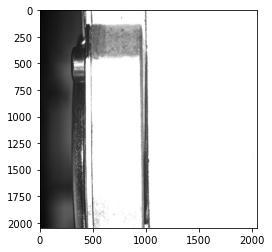

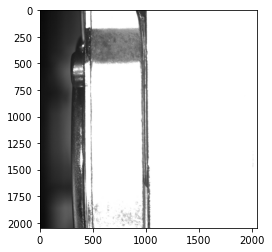

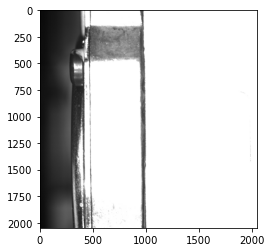

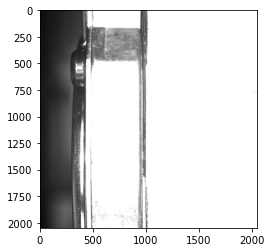

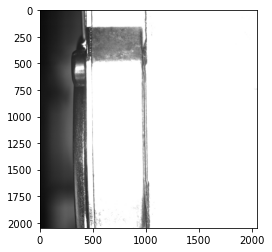

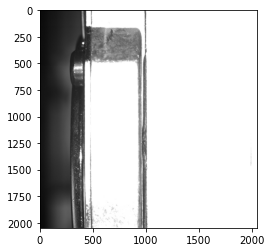

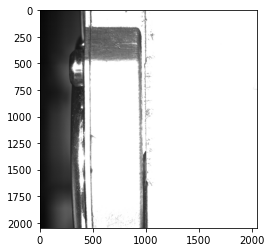

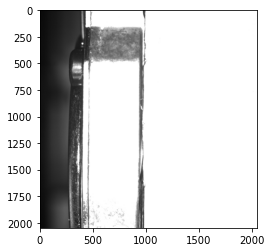

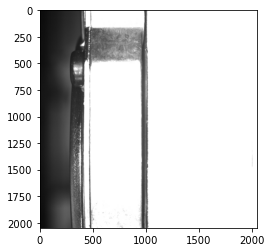

In [22]:
path = '/Users/leonardoaggio/Desktop/Dataset/S606C/ScartiTotali/*.tif'
#path = 'Desktop/Dataset/S606C/ScartiTotali/' 
border = 60
#Nclusters = 10

#results = []
imgs = []


list_paths = glob.glob(path) 
count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    try:
        plt.imshow(img)
        plt.show()
        temp = cutWorkSpace(img,border)
        imgs +=  divideImage(temp,pezziXimmagine)
        #plt.imshow(temp)
        #plt.show()
        count += 1
    except:
        print('errore lettura')



        
x_test_final = np.array(imgs)
x_test_final = x_test_final/255.       


x_temp = np.empty((len(imgs), rows,col,1))

for i in range(len(imgs)):
    x_temp[i]=(np.expand_dims(x_test_final[i], axis=2))
x_test_final = x_temp


x_test_final = x_test_final.astype('float32')

In [23]:
decoded_imgs_final = autoencoder_copy.predict(x_test_final)

In [24]:
values2 = []

for i in range(len(x_test_final)):
    print(str(i)+ ' su '+ str(len(x_test_final)))
    value_a = SSIMLoss(x_test_final[i],decoded_imgs_final[i])
    values2.append(value_a.numpy())

0 su 153
1 su 153
2 su 153
3 su 153
4 su 153
5 su 153
6 su 153
7 su 153
8 su 153
9 su 153
10 su 153
11 su 153
12 su 153
13 su 153
14 su 153
15 su 153
16 su 153
17 su 153
18 su 153
19 su 153
20 su 153
21 su 153
22 su 153
23 su 153
24 su 153
25 su 153
26 su 153
27 su 153
28 su 153
29 su 153
30 su 153
31 su 153
32 su 153
33 su 153
34 su 153
35 su 153
36 su 153
37 su 153
38 su 153
39 su 153
40 su 153
41 su 153
42 su 153
43 su 153
44 su 153
45 su 153
46 su 153
47 su 153
48 su 153
49 su 153
50 su 153
51 su 153
52 su 153
53 su 153
54 su 153
55 su 153
56 su 153
57 su 153
58 su 153
59 su 153
60 su 153
61 su 153
62 su 153
63 su 153
64 su 153
65 su 153
66 su 153
67 su 153
68 su 153
69 su 153
70 su 153
71 su 153
72 su 153
73 su 153
74 su 153
75 su 153
76 su 153
77 su 153
78 su 153
79 su 153
80 su 153
81 su 153
82 su 153
83 su 153
84 su 153
85 su 153
86 su 153
87 su 153
88 su 153
89 su 153
90 su 153
91 su 153
92 su 153
93 su 153
94 su 153
95 su 153
96 su 153
97 su 153
98 su 153
99 su 153
100 su 153

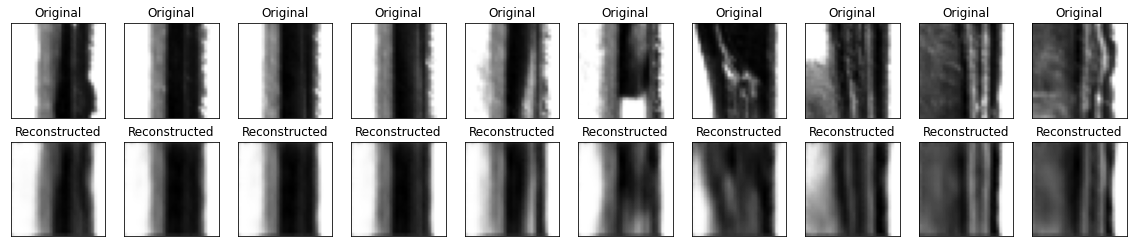

In [25]:
#decoded_imgs = autoencoder_copy.predict(x_test_final)
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_final[i+10].reshape(rows, col))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs_final[i+10].reshape(rows, col))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

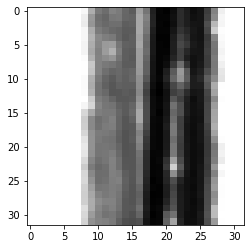

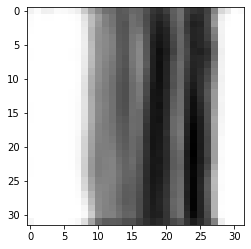

In [26]:
i = 10
plt.imshow(x_test_final[i].reshape(rows, col))
plt.show()
plt.imshow(decoded_imgs_final[i].reshape(rows, col))
plt.show()

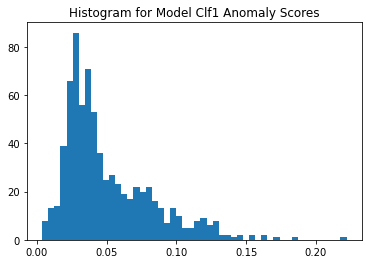

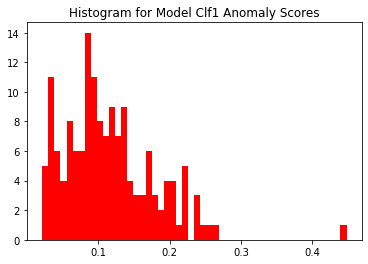

0.44775605


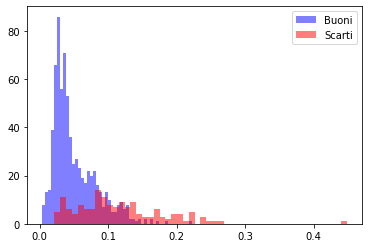

In [27]:
plt.hist(values1, bins=50)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

#print(np.min(values1))

plt.hist(values2, bins=50, color='r')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

print(np.max(values2))

x = values1
y = values2


plt.hist(x, bins=50, alpha=0.5, label='Buoni', color='b')
plt.hist(y, bins=50, alpha=0.5, label='Scarti', color = 'r')
plt.legend(loc='upper right')
plt.show()



In [28]:

scoreSTX = values2
scoreSTY = []
for i in range(len(scoreSTX)):
    scoreSTY.append((i+1))
    
scoreX = values1
scoreY = []
for i in range(len(scoreX)):
    scoreY.append(i)




In [29]:
def maxFiveAvg(list_in):
    num = 5
    temp = np.copy(list_in)
    ordered = np.sort(temp)
    avg = 0.
    for i in range(num):
        avg += ordered[len(list_in)-1-i]
    avg = avg / num

    return avg
            

In [30]:
#pezziXimmagine

scoreSTX = []
scoreSTY = []
temp = 0
for i in range(int(len(values2)/pezziXimmagine)):
    scoreSTX.append(maxFiveAvg(values2[i*pezziXimmagine:(i*pezziXimmagine)+pezziXimmagine]))
    scoreSTY.append(i)
    
scoreX = []
scoreY = []
for i in range(int(len(values1)/pezziXimmagine)):
    scoreX.append(maxFiveAvg(values1[i*pezziXimmagine:(i*pezziXimmagine)+pezziXimmagine]))
    scoreY.append(i)




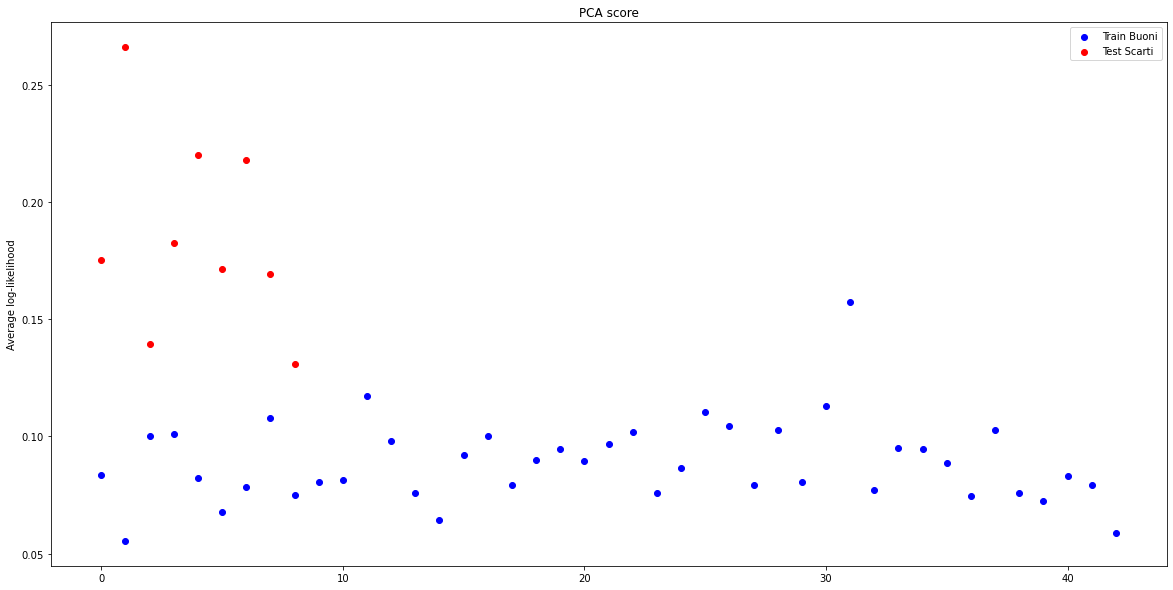

In [31]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
#plt.bar(scoreY,scoreX,label='Train Buoni',color='b',width=.5)
#plt.bar(scoreTOTY,scoreTOTX,label='Test Buoni',color='g',width=.5)
#plt.bar(scoreSTY,scoreSTX,label='Test Scarti',color='r',width=1.2)

plt.scatter(scoreY,scoreX,label='Train Buoni',color='b')
#plt.bar(scoreTOTY,scoreTOTX,label='Test Buoni',color='g',width=.5)
plt.scatter(scoreSTY,scoreSTX,label='Test Scarti',color='r')


#lim = -390
#x1 = [0, -600]
#y1 = [0, -600]
#plt.plot([-5,450],[lim,lim],label=('Limite identificazione scarto'))


#plt.bar([0.75,1.75,2.75,3.75,4.75],[50,30,20,50,60],

#label=”Female”, color=’g’,width=.5)

plt.legend()

#plt.xlabel('Days')

plt.ylabel('Average log-likelihood')
plt.title('PCA score')
plt.savefig('LogLik.png')
plt.show()




In [48]:
threshold = 0.16

falsi_scarti = 0
for el in scoreX:
    if el > threshold:
        falsi_scarti += 1
        
scarti = 0
for el in scoreSTX:
    if el > threshold:
        scarti += 1

In [49]:
falsi_scarti

0

In [50]:
scarti

7

In [35]:
path = '/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v2/*.tif'
#path = 'Desktop/Dataset/S606C/ScartiTotali/' 
border = 60
#Nclusters = 10

#results = []
imgs = []


list_paths = glob.glob(path) 
count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    try:
        temp = cutWorkSpace(img,border)
        imgs +=  divideImage(temp,pezziXimmagine)
        #plt.imshow(temp)
        #plt.show()
        count += 1
    except:
        print('errore lettura')



        
x_test_final_2 = np.array(imgs)
x_test_final_2 = x_test_final_2/255.       


x_temp = np.empty((len(imgs), rows,col,1))

for i in range(len(imgs)):
    x_temp[i]=(np.expand_dims(x_test_final_2[i], axis=2))
x_test_final_2 = x_temp


x_test_final_2 = x_test_final_2.astype('float32')

decoded_imgs_final_2 = autoencoder_copy.predict(x_test_final_2)

values3 = []

for i in range(len(x_test_final_2)):
    print(str(i)+ ' su '+ str(len(x_test_final_2)))
    value_a = SSIMLoss(x_test_final_2[i],decoded_imgs_final_2[i])
    values3.append(value_a.numpy())
    





0 su 7412
1 su 7412
2 su 7412
3 su 7412
4 su 7412
5 su 7412
6 su 7412
7 su 7412
8 su 7412
9 su 7412
10 su 7412
11 su 7412
12 su 7412
13 su 7412
14 su 7412
15 su 7412
16 su 7412
17 su 7412
18 su 7412
19 su 7412
20 su 7412
21 su 7412
22 su 7412
23 su 7412
24 su 7412
25 su 7412
26 su 7412
27 su 7412
28 su 7412
29 su 7412
30 su 7412
31 su 7412
32 su 7412
33 su 7412
34 su 7412
35 su 7412
36 su 7412
37 su 7412
38 su 7412
39 su 7412
40 su 7412
41 su 7412
42 su 7412
43 su 7412
44 su 7412
45 su 7412
46 su 7412
47 su 7412
48 su 7412
49 su 7412
50 su 7412
51 su 7412
52 su 7412
53 su 7412
54 su 7412
55 su 7412
56 su 7412
57 su 7412
58 su 7412
59 su 7412
60 su 7412
61 su 7412
62 su 7412
63 su 7412
64 su 7412
65 su 7412
66 su 7412
67 su 7412
68 su 7412
69 su 7412
70 su 7412
71 su 7412
72 su 7412
73 su 7412
74 su 7412
75 su 7412
76 su 7412
77 su 7412
78 su 7412
79 su 7412
80 su 7412
81 su 7412
82 su 7412
83 su 7412
84 su 7412
85 su 7412
86 su 7412
87 su 7412
88 su 7412
89 su 7412
90 su 7412
91 su 741

In [51]:
scoreSTX_2 = []
scoreSTY_2 = []



In [52]:
scoreSTX_2 = values3
scoreSTY_2 = []
for i in range(len(scoreSTX_2)):
    scoreSTY_2.append((i+1))



In [53]:
temp = 0
scoreSTX_2 = []
scoreSTY_2 = []
for i in range(int(len(values3)/pezziXimmagine)):
    scoreSTX_2.append(maxFiveAvg(values3[i*pezziXimmagine:(i*pezziXimmagine)+pezziXimmagine]))
    scoreSTY_2.append(i)

In [54]:
falsi_scarti = 0
for el in scoreSTX_2:
    if el > threshold:
        falsi_scarti += 1
print(falsi_scarti)

2


In [55]:
len(list_paths)

3

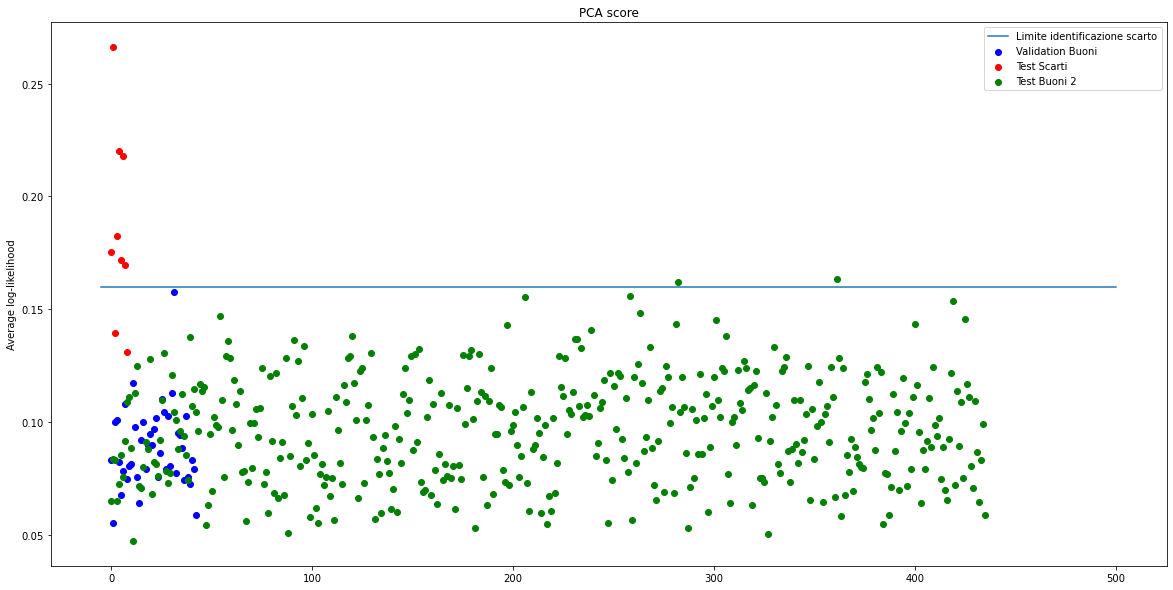

In [57]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
#plt.bar(scoreY,scoreX,label='Train Buoni',color='b',width=.5)
#plt.bar(scoreTOTY,scoreTOTX,label='Test Buoni',color='g',width=.5)
#plt.bar(scoreSTY,scoreSTX,label='Test Scarti',color='r',width=1.2)

plt.scatter(scoreY,scoreX,label='Validation Buoni',color='b')
#plt.bar(scoreTOTY,scoreTOTX,label='Test Buoni',color='g',width=.5)
plt.scatter(scoreSTY,scoreSTX,label='Test Scarti',color='r')

plt.scatter(scoreSTY_2,scoreSTX_2,label='Test Buoni 2',color='g')


plt.plot([-5,500],[threshold,threshold],label=('Limite identificazione scarto'))


#lim = -390
#x1 = [0, -600]
#y1 = [0, -600]
#plt.plot([-5,450],[lim,lim],label=('Limite identificazione scarto'))


#plt.bar([0.75,1.75,2.75,3.75,4.75],[50,30,20,50,60],

#label=”Female”, color=’g’,width=.5)

plt.legend()

#plt.xlabel('Days')

plt.ylabel('Average log-likelihood')
plt.title('PCA score')
plt.savefig('LogLik.png')
plt.show()





In [42]:
max_v = max(values1)
max_index = values1.index(max_v)

In [43]:
max_index

542

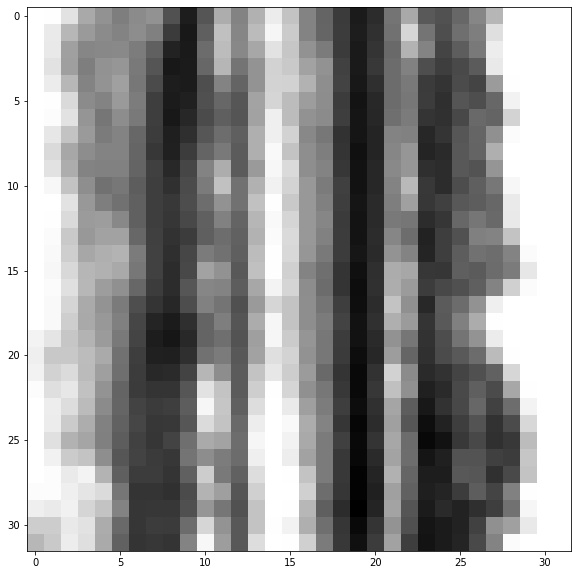

In [44]:
plt.imshow(img_test[max_index-1])
plt.show()

In [45]:
path = '/Users/leonardoaggio/Desktop/Dataset/S606C/ScartiVal/*.tif'
border = 60
imgs = []
list_paths = glob.glob(path) 
count = 0
for img_path in list_paths:
    img = cv2.imread(img_path)
    try:
        temp = cutWorkSpace(img,border)
        imgs +=  divideImage(temp,pezziXimmagine)
        #plt.imshow(temp)
        #plt.show()
        count += 1
    except:
        print('errore lettura')



        
x_test_final_2 = np.array(imgs)
x_test_final_2 = x_test_final_2/255.       

x_temp = np.empty((len(imgs), rows,col,1))

for i in range(len(imgs)):
    x_temp[i]=(np.expand_dims(x_test_final_2[i], axis=2))
x_test_final_2 = x_temp


x_test_final_2 = x_test_final_2.astype('float32')



In [46]:
from keras import backend as K 


get_6th_layer_output = K.function([autoencoder_copy.layers[0].input],
                                  [autoencoder_copy.layers[6].output])
layer_output = get_6th_layer_output([x_test_final_2])[0]

In [47]:
layer_output[0]

array([0.13553053, 0.9212115 , 0.1294221 , 0.33121943, 0.30554515,
       0.7820685 , 0.81074715, 0.31419283, 0.7262019 , 0.19780245,
       0.15936089, 0.15622932, 0.478179  , 0.36376032, 0.17036593,
       0.70977145, 0.12915418, 0.17413571, 0.26600933, 0.2785294 ,
       0.36231494, 0.29362452, 0.07847026, 0.26095876, 0.19520828,
       0.15414459, 0.2609536 , 0.6942656 , 0.16423193, 0.15600273,
       0.65954167, 0.07039744, 0.12199113, 0.39133933, 0.3131004 ,
       0.16945386, 0.22747004, 0.39207655, 0.36865455, 0.38199043,
       0.21748295, 0.4696912 , 0.34714195, 0.2006141 , 0.17229503,
       0.09455138, 0.1384452 , 0.10235479, 0.39318585, 0.21106476,
       0.3034301 , 0.5306675 , 0.7296833 , 0.33413473, 0.30109292,
       0.28196502, 0.64253014, 0.047555  , 0.421233  , 0.6271753 ,
       0.34935006, 0.10259545, 0.3157052 , 0.3215497 , 0.87171113,
       0.30380788, 0.3121686 , 0.18008462, 0.92113394, 0.2879154 ,
       0.15322575, 0.32278007, 0.3796379 , 0.04788738, 0.16446